<a href="https://colab.research.google.com/github/JazminRivas/C-lculo-num-rico-1er-cuatri-2024/blob/main/guia_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import interpolate

Ejercicio 1.

Para cada uno de los conjuntos de datos dados, calcular el polinomio $p(x)$ interpolador de grado menor o igual que 3:


 a) en la forma de Lagrange,

 b) por coeficientes indeterminados,

 c) utilizando diferencias divididas.

Verificar los resultados en Python, utilizando el comando np.polyfit. Graficar el polinomio interpolador, usando np.polyval.

$x$ $-1$ $0$ $2$ $3$

$y$ $-1$ $3$ $11$ $27$



$x$ $-1$ $0$ $1$ $2$

$y$ $-3$ $1$ $1$ $3$

[-1.  4.  0.  1.]


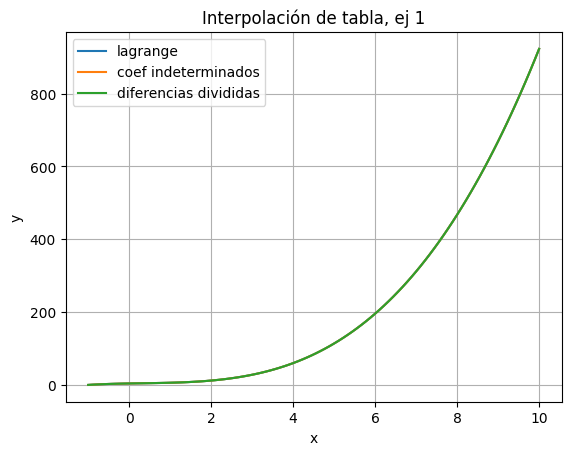

In [ ]:
#A
def productoria(Xs,i,X_Eval):
    producto = 1
    for j in range (0,len(Xs)):
       if j != i:
           pol = (X_Eval - Xs[j])/(Xs[i] - Xs[j])
           producto = producto*pol
    return producto

def polinomio_lagrange(Xs,Ys,X_Eval): #este codigo devuelve al polinomio interpolador de lagrange evaluado en un punto
    listasuma = []
    for i in range (0,len(Xs)):
       sumatoria =  productoria(Xs,i,X_Eval)*Ys[i]
       listasuma.append(sumatoria)
    return sum(listasuma)

#B
def coeficientes_indeterminados(x,y,n): #n es el grado del polinomio
  A = np.vander(x,n+1) #tiene n+1 columnas porque tiene n+1 coeficientes
  coef = np.linalg.solve(A,y)
  return coef


#C
def diferencias_divididas(x,y):
    n = len(x)
    tabla = np.zeros((n,n))
    tabla[:,0] = y # la primera columna es la f(x_i), 1<i<n
    for j in range(1,n): #el j itera sobre las columnas, arranco en 1 porque la 0 ya la sé
        for i in range(j,n): #la matriz es LOWER
            tabla[i][j] = (tabla[i][j-1]-tabla[i-1][j-1])/(x[i] - x[i-j])
    return tabla

def polinomio_hermite(A,x,x_eval): #le metes la matriz de diferencias divididas (o la de hermite), los valores de x y un x_eval para evaluar al polinomio
  coeficientes = np.diag(A)
  print(coeficientes)
  evaluacion_total = coeficientes[0]
  producto = 1
  for i in range(1,len(coeficientes)):
    producto = producto*(x_eval-x[i-1])
    evaluacion_total += coeficientes[i]*producto
  return evaluacion_total

x = np.array([-1, 0, 2, 3])
y = np.array([-1, 3, 11, 27])
#Vamos a ver si generan el mismo grafico
A = diferencias_divididas(x,y)
x_graf = np.linspace(-1,10,100)
plt.plot(x_graf,polinomio_lagrange(x,y,x_graf),label="lagrange")
plt.plot(x_graf,np.poly1d(coeficientes_indeterminados(x,y,3))(x_graf),label ="coef indeterminados")
plt.plot(x_graf,polinomio_hermite(A,x,x_graf),label = "diferencias divididas")
plt.title('Interpolación de tabla, ej 1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
#funcionan todos OK


Ejercicio 2.

Agregar a las tablas de datos del Ejercicio 1 el punto x = 4, y = 1. Calcular los
polinomios interpoladores, aumentando las tablas de diferencias divididas.

In [ ]:
#ej 2, agrego el punto (4,1)
x = [-1,0,2,3,4]
y = [-1,3,11,27,1]
pol = np.polyfit(x,y,4)
print(np.polyval(pol,x))

[-1.  3. 11. 27.  1.]
[[ -1.     0.     0.     0.     0.  ]
 [  3.     4.     0.     0.     0.  ]
 [ 11.     4.     0.     0.     0.  ]
 [ 27.    16.     4.     1.     0.  ]
 [  1.   -26.   -21.    -6.25  -1.45]]


Ejercicio 5

Interpolar cada una de las siguientes funciones en \(n + 1\) puntos equiespaciados en el intervalo $[-1, 1]$. Graficar simultáneamente la función con sus respectivos interpoladores para $n = 5, 10, 15$.

$f_1(x) = \frac{1}{1 + 25x^2}, \quad f_2(x) = |x|, \quad f_3(x) = \sin(\pi x)$


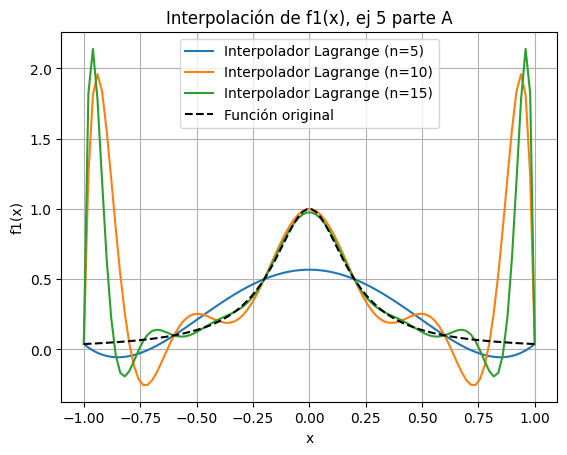

In [ ]:
#A
def f_a(x):
    return 1/(1+25*x**2)
# Defino puntos para graficar la función original
x_grafico = np.linspace(-1, 1, 100)
y_original = f_a(x_grafico)
valores_n = [5,10,15]
for n in valores_n:
    x = np.linspace(-1,1,n+1)
    y = [f_a(x) for x in x]
    y_lagrange = [polinomio_lagrange(x,y,x_eval) for x_eval in x_grafico] #evaluo al polinomio interpolador de lagrange en los mismos puntos que la funcion
    plt.plot(x_grafico,y_lagrange,label='Interpolador Lagrange (n=' + str(n) + ')')

#grafico la funcion original:
plt.plot(x_grafico, y_original, 'k--', label='Función original')

# Configuración de la gráfica
plt.title('Interpolación de f1(x), ej 5 parte A')
plt.xlabel('x')
plt.ylabel('f1(x)')
plt.legend()
plt.grid(True)
plt.show()

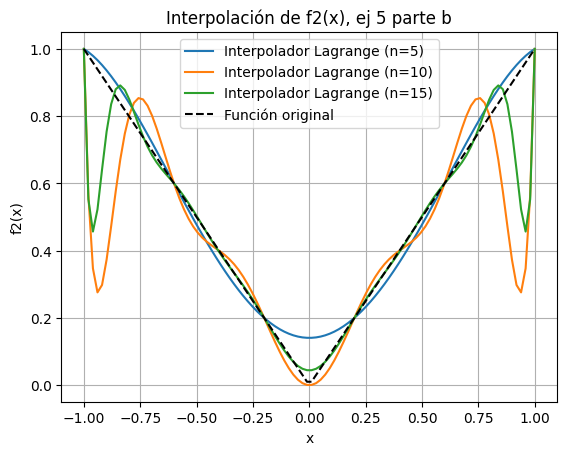

In [ ]:
def f_b(x):
    if x>0:
        return x
    elif x<0:
        return -x
    else:
        return 0
y_b = [f_b(x) for x in x_grafico]
for n in valores_n:
    x = np.linspace(-1,1,n+1)
    y = [f_b(x) for x in x]
    y_lagrangeB = [polinomio_lagrange(x,y,x_eval) for x_eval in x_grafico] #evaluo al polinomio interpolador en los mismos puntos que la funcion
    plt.plot(x_grafico,y_lagrangeB,label='Interpolador Lagrange (n=' + str(n) + ')')

#grafico la funcion original:
plt.plot(x_grafico, y_b, 'k--', label='Función original')

# Configuración de la gráfica
plt.title('Interpolación de f2(x), ej 5 parte b')
plt.xlabel('x')
plt.ylabel('f2(x)')
plt.legend()
plt.grid(True)
plt.show()


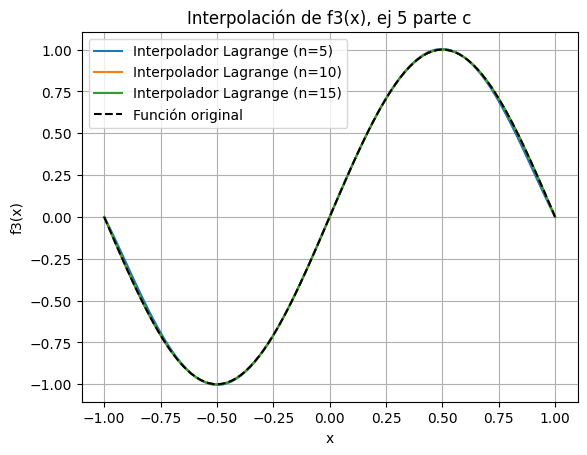

In [ ]:
def f_c(x):
    return np.sin(np.pi*x)
y_c = [f_c(x) for x in x_grafico]
for n in valores_n:
    x = np.linspace(-1,1,n+1)
    y = [f_c(x) for x in x]
    y_lagrangeC = [polinomio_lagrange(x,y,x_eval) for x_eval in x_grafico] #evaluo al polinomio interpolador en los mismos puntos que la funcion
    plt.plot(x_grafico,y_lagrangeC,label='Interpolador Lagrange (n=' + str(n) + ')')

#grafico la funcion original:
plt.plot(x_grafico, y_c, 'k--', label='Función original')

# Configuración de la gráfica
plt.title('Interpolación de f3(x), ej 5 parte c')
plt.xlabel('x')
plt.ylabel('f3(x)')
plt.legend()
plt.grid(True)
plt.show()

Ejercicio 6

Encontrar una función del tipo $2^{ax^3+bx^2+cx+d}$ que interpole la siguiente tabla de datos:

\begin{array}{|c|c|}
\hline
x & y \\
\hline
-1 & 1 \\
0 & 1 \\
1 & 0.5 \\
2 & 4 \\
\hline
\end{array}


In [ ]:
#si tiene que ser 2^algo, busco que el resultado sea en log_2 para tener el polinomio en si
x_ej6 = [-1,0,1,2]
y_tablita = [1,1,0.5,4]
y_ej6 = [math.log2(y) for y in y_tablita]
print(np.polyfit(x_ej6,y_ej6,3))

[ 8.33333333e-01 -5.00000000e-01 -1.33333333e+00 -2.66453526e-15]


Ejercicio 7

Hallar y graficar una función del tipo $e^{a_4x^4 + a_3x^3 + \ldots + a_0}$ que interpole a la función $f(x) = \frac{1}{x}$ en 5 nodos equiespaciados en el intervalo $[1, 10]$.

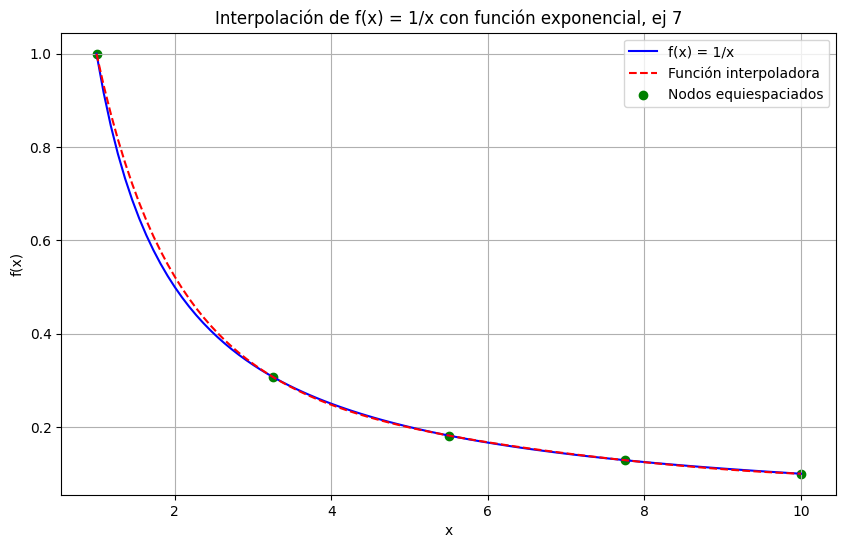

In [ ]:
x_ej7 = np.linspace(1,10,5)
def f_ej7(x):
    return 1/x
y_ej7 =[np.log(f_ej7(x)) for x in x_ej7]  #le aplico logaritmo a los valores de y para encontrar al exponente
coeficientes_pol = np.polyfit(x_ej7,y_ej7,len(x_ej7)-1)    #el grado es len(x_ej7) - 1 xq un pol de n+1 datos tiene grado n
#print(coeficientes_pol)

def pol_interpolador_ej7(p, x): #una vez que conseguimos el exponente, evaluamos en el polinomio interpolador original con los valores originales
    return np.exp(np.polyval(p, x))
x_graf = np.linspace(1, 10, 100)
y_ej7_interpolada = [pol_interpolador_ej7(coeficientes_pol, x)for x in x_graf]
# Graficamos la función original, la interpolada y los nodos
plt.figure(figsize=(10, 6))
plt.plot(x_graf, f_ej7(x_graf), label='f(x) = 1/x', color='blue')
plt.plot(x_graf, y_ej7_interpolada, label='Función interpoladora', color='red', linestyle='--')
plt.scatter(x_ej7, np.exp(y_ej7), label='Nodos equiespaciados', color='green')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolación de f(x) = 1/x con función exponencial, ej 7')
plt.legend()
plt.grid(True)
plt.show()

Ejercicio 11

a) Sea $ f(x) = \cos(\pi x) $, hallar un polinomio de grado menor o igual que 3 que verifique $ p(-1) = f(-1) ,  p(0) = f(0) ,  p(1) = f(1) ,  p'(1) = f'(1) $.

b) Hallar un polinomio de grado menor o igual que 4 que verifique las condiciones del ítem anterior, más la condición $p''(1) = f''(1) $.

La sol del ej. 11 a es [ 2. -2. -2.  1.]
[-1.  2. -2.  2.]


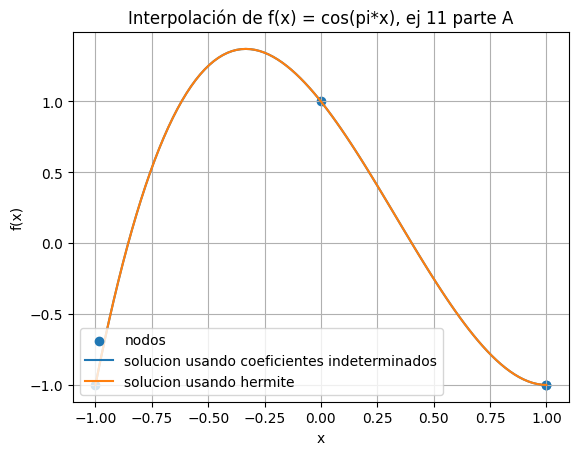

In [ ]:
def f(x):
  return np.cos(np.pi*x)
x = [-1,0,1,1]
y = [f(x) for x in x]

def fprima(x):
  return -np.pi*np.sin(np.pi*x)
#veamos el polinomio que nos queda si planteamos la matriz (hecho en hoja)
A = np.array([[1,-1,1,-1],[1,0,0,0],[1,1,1,1],[0,1,2,3]])
b = np.array([-1,1,-1,0])
sol = np.flip(np.linalg.solve(A, b))
print("La sol del ej. 11 a es", (sol)) #lo doy vuelta para que devuelva [a3,a2,a1,a0]

#Ahora hacemos diferencias divididas usando Hermite y graficamos ambos
def hermite(x,y,fprima): #este codigo calcula la interpolacion de hermite si me ponen condiciones sobre la derivada primera:
  n = len(x)
  tabla = np.zeros((n,n))
  tabla[:,0] = y # la primera columna es la f(x_i), 1<i<n
  for j in range(1,n): #el j itera sobre las columnas, arranco en 1 porque la 0 ya la sé
      for i in range(j,n): #la matriz es LOWER
          denominador = (x[i] - x[i-j])
          if denominador ==0 and j==1: #si estas en la primera columna y da 0, haceme la primer derivada (la segunda condicion sirve mas para cuando haya mas derivadas que solo la primera)
            tabla[i][j]=fprima(x[i])
          else:
            tabla[i][j] = (tabla[i][j-1]-tabla[i-1][j-1])/denominador
  return tabla

A =hermite(x,y,fprima)
x_val = np.linspace(-1,1,100)
plt.scatter(x,y,label = "nodos")
plt.plot(x_val, np.poly1d(sol)(x_val), label = "solucion usando coeficientes indeterminados")
plt.plot(x_val,polinomio_hermite(A,x,x_val), label = "solucion usando hermite")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolación de f(x) = cos(pi*x), ej 11 parte A')
plt.legend()
plt.grid(True)
plt.show()

#funciona espectacular


[-1.  2. -2.  2. -2.]


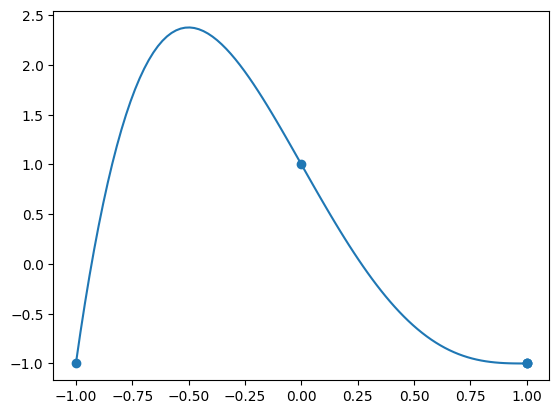

In [ ]:
#B, ahora hacemos con la derivada segunda
def fsegunda(x):
  return -np.pi**2*np.sin(np.pi*x)

def hermite_segundo(x,y,fprima,fsegunda): #este calcula si me ponen condiciones sobre la derivada segunda y sobre la primera:
  n = len(x)
  tabla = np.zeros((n,n))
  tabla[:,0] = y # la primera columna es la f(x_i), 1<i<n
  for j in range(1,n): #el j itera sobre las columnas, arranco en 1 porque la 0 ya la sé
      for i in range(j,n): #la matriz es LOWER
          denominador = (x[i] - x[i-j])
          if denominador==0:
            if j==1: #si estas en la primera columna y da 0, haceme la primer derivada
              tabla[i][j]=fprima(x[i])
            elif j==2: #si estas en la segunda columna, hace f''(x[i])/2!
              tabla[i][j]=fsegunda(x[i])/math.factorial(j)
          else:
            tabla[i][j] = (tabla[i][j-1]-tabla[i-1][j-1])/denominador
  return tabla
x = [-1,0,1,1,1]
y = [f(x) for x in x]
B = hermite_segundo(x,y,fprima,fsegunda)
plt.plot(x_val,polinomio_hermite(B,x,x_val))
plt.scatter(x,y)

Ejercicio 15

Sea $f : [0, 1] \rightarrow \mathbb{R}$, $f(x) = \sin(\pi x) + e^x$. Sea $P_n$ el polinomio de grado $n$ que interpola a $f$ en $n + 1$ puntos equiespaciados.

a) Usando el Ejercicio 12, acotar el error $\| f - P_n \|_\infty$.

b) Sea $C_n$ la cota hallada en (a). Para $n = 1, 3, 5$, graficar simultáneamente $f$, $f + C_n$, $f - C_n$ y $P_n$.



<ipython-input-44-10fece79074f>:19: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  Cn = (np.pi**(n + 1) + np.exp(1)) / np.math.factorial(n + 1)


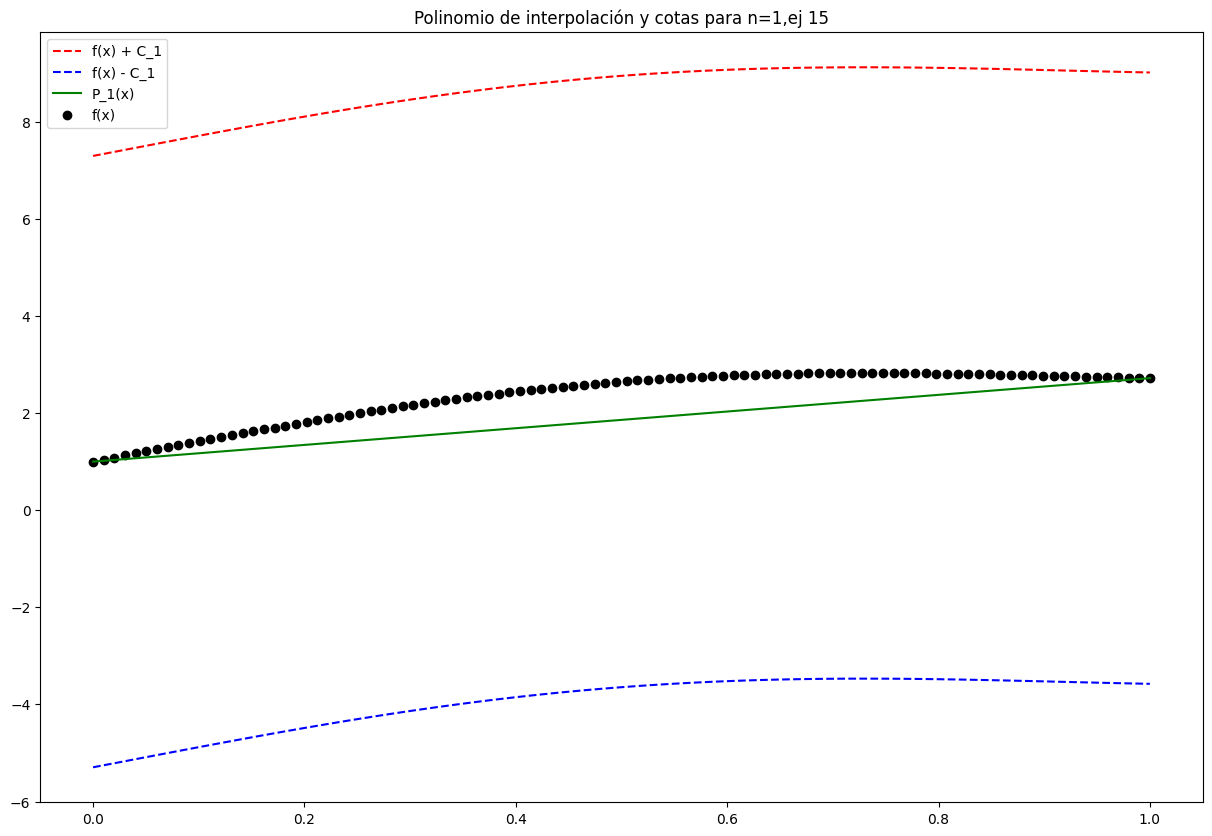

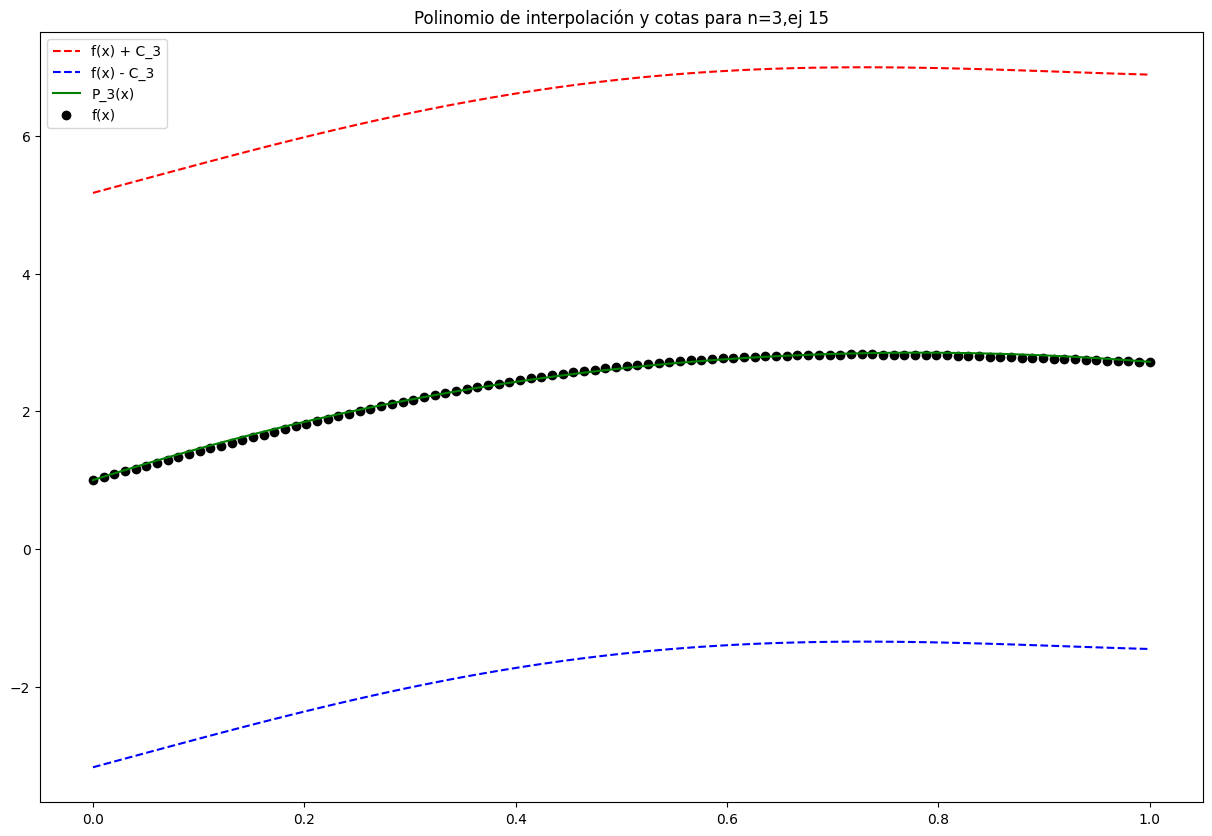

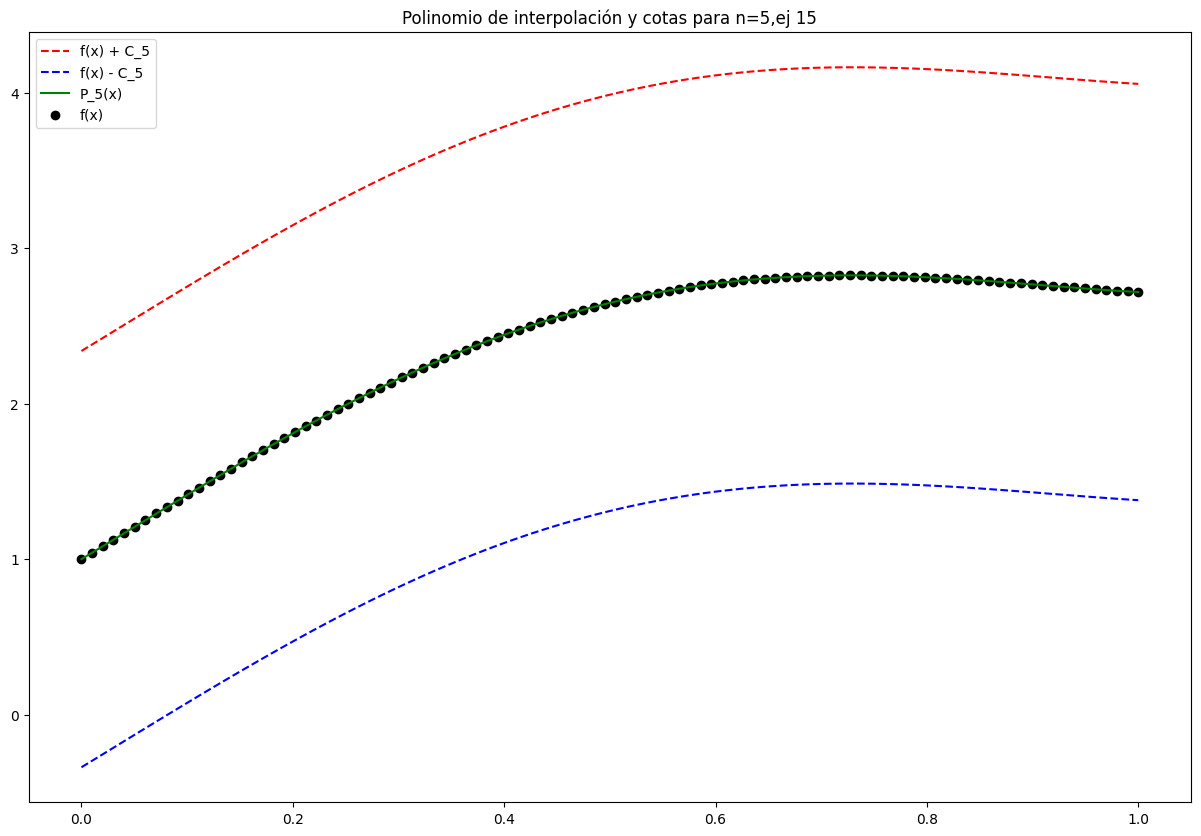

In [ ]:
#Parte B

def f_ej15(x):
    return np.sin(np.pi*x)+np.exp(x)
x_graf15 = np.linspace(0, 1, 100)

#sabemos que la cota es Cn = pi ^n+1 + e^x / (n+1)!, tengo que graficar f(x), f(x) + cn, f(x) - cn y pn para n = 1,3,5
ns = [1,3,5]

for n in ns:
    # Puntos de interpolación
    x_ej15 = np.linspace(0, 1, n + 1)
    y_ej15 = f_ej15(x_ej15)
    # Polinomio de interpolación usando polyfit
    coeficientes = np.polyfit(x_ej15, y_ej15, n)
    Pn = np.poly1d(coeficientes)

    # Cota de error
    Cn = (np.pi**(n + 1) + np.exp(1)) / np.math.factorial(n + 1)

    # Gráficas
    plt.figure(figsize=(15, 10))
    plt.plot(x_graf15, f_ej15(x_graf15) + Cn, 'r--', label=f"f(x) + C_{n}")
    plt.plot(x_graf15, f_ej15(x_graf15) - Cn, 'b--', label=f"f(x) - C_{n}")
    plt.plot(x_graf15, Pn(x_graf15), label=f"P_{n}(x)", color="green")
    plt.scatter(x_graf15, f_ej15(x_graf15), label="f(x)", color="black")
    plt.legend()
    plt.title(f"Polinomio de interpolación y cotas para n={n},ej 15")
    plt.show()


Ejercicio 18

Para $n = 5, 10, 15$, graficar simultáneamente el polinomio $W_{n+1}(x) = \prod_{i=0}^{n}(x - x_i)$, donde $x_i = -1 + \frac{2i}{n}$, $i = 0, \ldots, n$, y el polinomio de Tchebychev $T_{n+1}$.


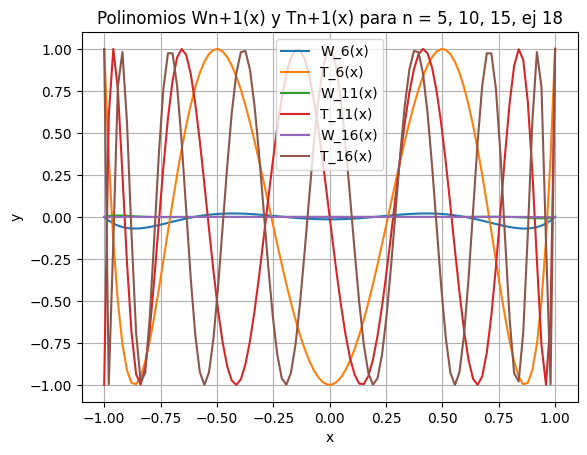

In [ ]:
#ej 18, necesito graficar Wn+1 y el pol de Tchebychev en n = 5,10,15
#defino la grilla donde lo voy a graficar
x_graf18 = np.linspace(-1, 1, 100)
n_ej18 = [5,10,15]
def w_n(x,n): #n son la cantidad de raices
    prod = 1
    for i in range(n+1): #como el n esta incluido, va hasta n+1
        xi = -1 + 2*i/n
        prod = prod*(x-xi)
    return prod

def pol_tchebychev(n):
    if n==0:
        return np.poly1d(1) #devuelve el polinomio 1
    if n==1:
        return np.poly1d([1,0]) #devuelve el polinomio x
    else: #empiezo la recurrencia Tk+1 = 2x*Tk - Tk-1
        return 2*np.poly1d([1,0])*pol_tchebychev(n-1) - pol_tchebychev(n-2)
for n in n_ej18:
    wn = w_n(x_graf18,n)
    tn = pol_tchebychev(n+1)(x_graf18) #consigo el pol que es un np.poly1d y al poner (x_graf18) me deja evaluarlo :)
    plt.plot(x_graf18,wn,label=f'W_{n+1}(x)')
    plt.plot(x_graf18,tn, label=f'T_{n+1}(x)')
plt.legend()
plt.title('Polinomios Wn+1(x) y Tn+1(x) para n = 5, 10, 15, ej 18')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Ejercicio 19

Repetir el Ejercicio 5 usando los polinomios que interpolan a la función f en
los ceros del polinomio de Tchebychev de grado n + 1, para n = 5, 10, 15.


<ipython-input-53-37fa5078925e>:6: RankWarning: Polyfit may be poorly conditioned
  y_tchebychev = np.poly1d(np.polyfit(ceros_tchebychev, y, n+1))(x_grafico) #evaluo al polinomio interpolador en los mismos puntos que la funcion
<ipython-input-53-37fa5078925e>:6: RankWarning: Polyfit may be poorly conditioned
  y_tchebychev = np.poly1d(np.polyfit(ceros_tchebychev, y, n+1))(x_grafico) #evaluo al polinomio interpolador en los mismos puntos que la funcion
<ipython-input-53-37fa5078925e>:6: RankWarning: Polyfit may be poorly conditioned
  y_tchebychev = np.poly1d(np.polyfit(ceros_tchebychev, y, n+1))(x_grafico) #evaluo al polinomio interpolador en los mismos puntos que la funcion


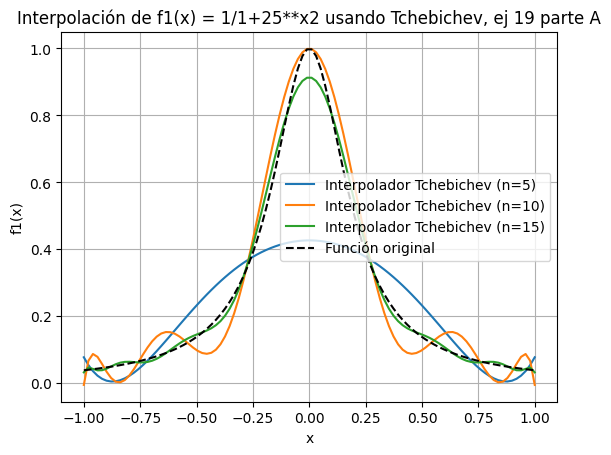

In [ ]:
#OBS: estamos en el intervalo [-1,1], por eso nos sirven los ceros del código anterior
#A
n_ej19 = [5,10,15]
for n in n_ej19:
    ceros_tchebychev = np.roots(pol_tchebychev(n+1))
#vamos a usar f_a del ej 5
    y = [f_a(x) for x in ceros_tchebychev]
    y_tchebychev = np.poly1d(np.polyfit(ceros_tchebychev, y, n+1))(x_grafico) #evaluo al polinomio interpolador en los mismos puntos que la funcion
    plt.plot(x_grafico,y_tchebychev,label='Interpolador Tchebichev (n=' + str(n) + ')')

#grafico la funcion original:
plt.plot(x_grafico, y_original, 'k--', label='Función original')

# Configuración de la gráfica
plt.title('Interpolación de f1(x) = 1/1+25**x2 usando Tchebichev, ej 19 parte A')
plt.xlabel('x')
plt.ylabel('f1(x)')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-54-cafc8e76cf1c>:6: RankWarning: Polyfit may be poorly conditioned
  y_tchebychev = np.poly1d(np.polyfit(ceros_tchebychev, y, n+1))(x_grafico) #evaluo al polinomio interpolador en los mismos puntos que la funcion
<ipython-input-54-cafc8e76cf1c>:6: RankWarning: Polyfit may be poorly conditioned
  y_tchebychev = np.poly1d(np.polyfit(ceros_tchebychev, y, n+1))(x_grafico) #evaluo al polinomio interpolador en los mismos puntos que la funcion
<ipython-input-54-cafc8e76cf1c>:6: RankWarning: Polyfit may be poorly conditioned
  y_tchebychev = np.poly1d(np.polyfit(ceros_tchebychev, y, n+1))(x_grafico) #evaluo al polinomio interpolador en los mismos puntos que la funcion


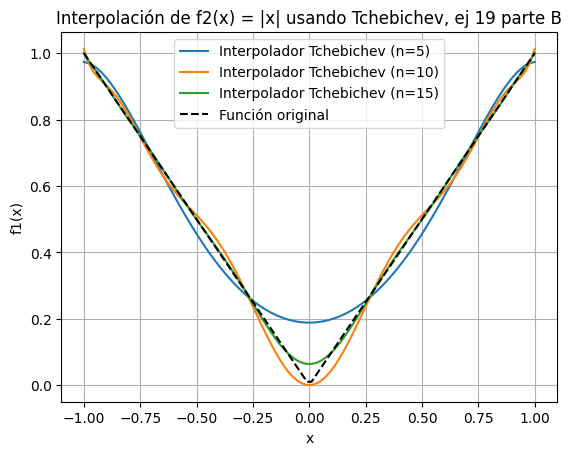

In [ ]:
#B
for n in n_ej19:
    ceros_tchebychev = np.roots(pol_tchebychev(n+1))
#vamos a usar f_b del ej 5
    y = [f_b(x) for x in ceros_tchebychev]
    y_tchebychev = np.poly1d(np.polyfit(ceros_tchebychev, y, n+1))(x_grafico) #evaluo al polinomio interpolador en los mismos puntos que la funcion
    plt.plot(x_grafico,y_tchebychev,label='Interpolador Tchebichev (n=' + str(n) + ')')

#grafico la funcion original:
plt.plot(x_grafico, y_b, 'k--', label='Función original')

# Configuración de la gráfica
plt.title('Interpolación de f2(x) = |x| usando Tchebichev, ej 19 parte B')
plt.xlabel('x')
plt.ylabel('f1(x)')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-55-9bd059eaaffd>:7: RankWarning: Polyfit may be poorly conditioned
  y_tchebychev = np.poly1d(np.polyfit(ceros_tchebychev, y, n+1))(x_grafico) #evaluo al polinomio interpolador en los mismos puntos que la funcion
<ipython-input-55-9bd059eaaffd>:7: RankWarning: Polyfit may be poorly conditioned
  y_tchebychev = np.poly1d(np.polyfit(ceros_tchebychev, y, n+1))(x_grafico) #evaluo al polinomio interpolador en los mismos puntos que la funcion
<ipython-input-55-9bd059eaaffd>:7: RankWarning: Polyfit may be poorly conditioned
  y_tchebychev = np.poly1d(np.polyfit(ceros_tchebychev, y, n+1))(x_grafico) #evaluo al polinomio interpolador en los mismos puntos que la funcion


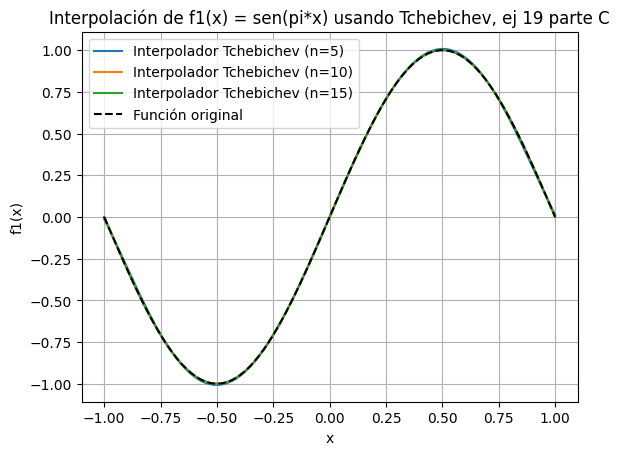

In [ ]:
#C

for n in n_ej19:
    ceros_tchebychev = np.roots(pol_tchebychev(n+1))
#vamos a usar f_a del ej 5
    y = [f_c(x) for x in ceros_tchebychev]
    y_tchebychev = np.poly1d(np.polyfit(ceros_tchebychev, y, n+1))(x_grafico) #evaluo al polinomio interpolador en los mismos puntos que la funcion
    plt.plot(x_grafico,y_tchebychev,label='Interpolador Tchebichev (n=' + str(n) + ')')

#grafico la funcion original:
plt.plot(x_grafico, y_c, 'k--', label='Función original')

# Configuración de la gráfica
plt.title('Interpolación de f1(x) = sen(pi*x) usando Tchebichev, ej 19 parte C')
plt.xlabel('x')
plt.ylabel('f1(x)')
plt.legend()
plt.grid(True)
plt.show()

Ejercicio 22

Calcular un spline cúbico que interpole los datos: $x = (0, 0.5, 1)$, $y = (0, 1, 0)$. Graficar el spline junto con la función $\sin(\pi x)$.

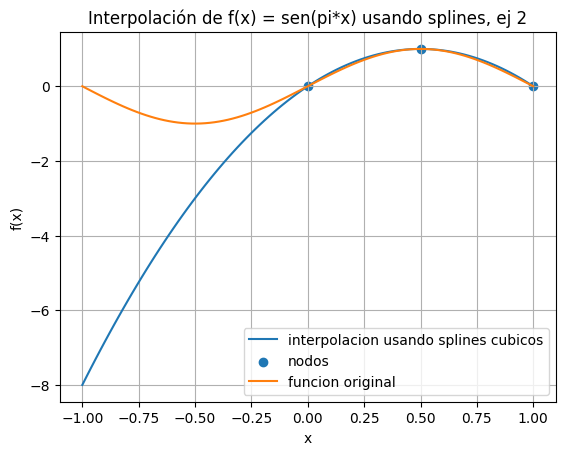

In [ ]:
x = [0,0.5,1]
y = [0,1,0]
p = interpolate.CubicSpline(x,y)
plt.plot(x_val,p(x_val), label = "interpolacion usando splines cubicos")
plt.scatter(x,y, label = "nodos")
def f(x): #comparo con la función
  return np.sin(np.pi*x)
plt.plot(x_val,f(x_val),label = "funcion original")
plt.title('Interpolación de f(x) = sen(pi*x) usando splines, ej 2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()